In [5]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.losses import binary_crossentropy
import pyarrow.feather as feather
import numpy as np
from cnn import fish_cnn1, fish_cnn2, fish_cnn3, fish_cnn4
import matplotlib.pyplot as plt

: 

: 

In [2]:
# get data
data = feather.read_feather("C:\\Users\\budde\\Desktop\\DS4420\\ds4420_final\\data\\working\\fish_frames.feather")
X = data.drop('label', axis=1).to_numpy()
y = data['label'].to_numpy()

In [3]:
X

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [ 37,  37,  38, ..., 100,  96,  96],
       [ 37,  38,  38, ..., 101,  98,  98],
       [ 38,  38,  38, ..., 100,  98,  98]], shape=(5115, 101376))

Check to see the performance of our model

In [4]:
img_rows, img_cols = 288, 352

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# add dimensionality and scale
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) / 255
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1) / 255


# fit model with training data
model = fish_cnn1(img_rows, img_cols)
model.fit(X_train, y_train, epochs=10, verbose=True, batch_size=30)


score = model.evaluate(X_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

Epoch 1/10


c:\Users\budde\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 288, 352, 1))
  warnings.warn(msg)


137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 252ms/step - accuracy: 0.9627 - loss: 0.0578
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 254ms/step - accuracy: 1.0000 - loss: 0.0010
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 250ms/step - accuracy: 1.0000 - loss: 4.7196e-04
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 257ms/step - accuracy: 1.0000 - loss: 2.5617e-04
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 249ms/step - accuracy: 1.0000 - loss: 1.8684e-04
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 251ms/step - accuracy: 1.0000 - loss: 1.5536e-04
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 247ms/step - accuracy: 1.0000 - loss: 1.1379e-04
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 247ms/step - accuracy: 1.0000 - loss: 1.0201e-04
Epoch 9/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 247ms/step - accuracy: 1.0000 - loss: 8.1487e-05
Epoch 10/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 247ms/step - accuracy: 1.0000 - loss: 8.1123e-05
loss= 0.00010629811004037037
accuracy= 1.0


Perform K-folds cross validation to ensure accuracy given our limited data size:

In [ ]:
# Custom scoring function for cross_val_score
def custom_score(model, X, y):
    model.fit(X, y, epochs=10, verbose=0, batch_size=30)
    loss, accuracy = model.evaluate(X, y, verbose=0)
    return accuracy

def test_models(model, X, y):
    # K-Fold Cross-Validation
    kf = KFold(n_splits=4, shuffle=True, random_state=42)
    scores_kf = []

    # Loop through K-Fold splits manually
    for train_index, test_index in kf.split(X):

        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # Add the dimensionality and scale
        X_train_fold = X_train_fold.reshape(X_train_fold.shape[0], img_rows, img_cols, 1) / 255
        X_test_fold = X_test_fold.reshape(X_test_fold.shape[0], img_rows, img_cols, 1) / 255
        
        # Train model and evaluate on fold
        score = custom_score(model, X_train_fold, y_train_fold)
        scores_kf.append(score)
        
    print("K-Fold Cross-Validation Scores:", scores_kf)
    print("Mean K-Fold Cross-Validation Score:", np.mean(scores_kf))

K-Fold Cross-Validation Scores: [1.0, 1.0, 1.0, 1.0]
Mean K-Fold Cross-Validation Score: 1.0


In [ ]:
test_models(fish_cnn1, X, y)

In [ ]:
test_models(fish_cnn2, X, y)

In [ ]:
test_models(fish_cnn3, X, y)

In [ ]:
test_models(fish_cnn4, X, y)

Lets make sure the data is what we think it is (footage either with a fish present or no fish present)!

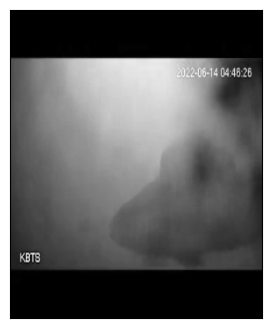

In [53]:
def plot_img(x, im_shape):
    plt.imshow(x.reshape(im_shape), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.gcf().set_size_inches(4, 4)
#-465
plot_img(X[211], im_shape=(352, 288))

Hello Mr.Fish! A pleasure to meet you :)